In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import operator
from PIL import Image
import math

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
x_area=0
class size:
        clase_0003= x_area<0.003
        clase_0003_0014= x_area>=0.003 and x_area <= 0.014
        clase_0014_0032= x_area>0.014 and x_area <= 0.032
        clase_0032_0045= x_area>0.032 and x_area <=0.045
        clase_0045_0063= x_area>0.045 and x_area <=0.063
        clase_0063_0090= x_area>0.063 and x_area <=0.090
        clase_0090_0125= x_area>0.090 and x_area <=0.125
        clase_0125_0180= x_area>0.125 and x_area <=0.180
        clase_0180_0250= x_area>0.180 and x_area <=0.250
        clase_0250_0350= x_area>0.250 and x_area <=0.350
        clase_0350_0500= x_area>0.350 and x_area <=0.500
        clase_0500_0710= x_area>0.500 and x_area <=0.710
        clase_0710_1000= x_area>0.710 and x_area <=1.000
        clase_1000_1400= x_area>1.000 and x_area <=1.400
        clase_1400_2000= x_area>1.400 and x_area <=2.000
        clase_2000_2800= x_area>2.000 and x_area <=2.800
        clase_2800_4000= x_area>2.800 and x_area <=4.000
        clase_4000_5600= x_area>4.000 and x_area <=5.600
        clase_5600_8000= x_area>5.600 and x_area <=8.000
        clase_8000_11200= x_area>8.000 and x_area <=11.200
        clase_11200_16000= x_area>11.200 and x_area <=16.000
        clase_16000_22400= x_area>16.000 and x_area <=22.400
        clase_22400_32000= x_area>22.400 and x_area <=32.000

# Importo la imagine ed verifico i valori x,y ed dei px

In [4]:
path="C:/Users/jfran/OneDrive/Escritorio/1mm_pr.png"
ruta_resultados="C:/Users/jfran/OneDrive/Escritorio/test_bach/"

In [5]:
image= cv2.imread(path,0)
image_array= np.array(image)

In [6]:
height, width = image.shape
print(" l'alterzza della imgine e' : ",height,"\n","ed la Largezza della imagine e': ",width)
print(" I valori dei px della imagine sono: ",np.unique(image))

 l'alterzza della imgine e' :  576 
 ed la Largezza della imagine e':  752
 I valori dei px della imagine sono:  [  0 255]


Text(0.5, 1.0, 'BINARY IMAGE OF 1 MM')

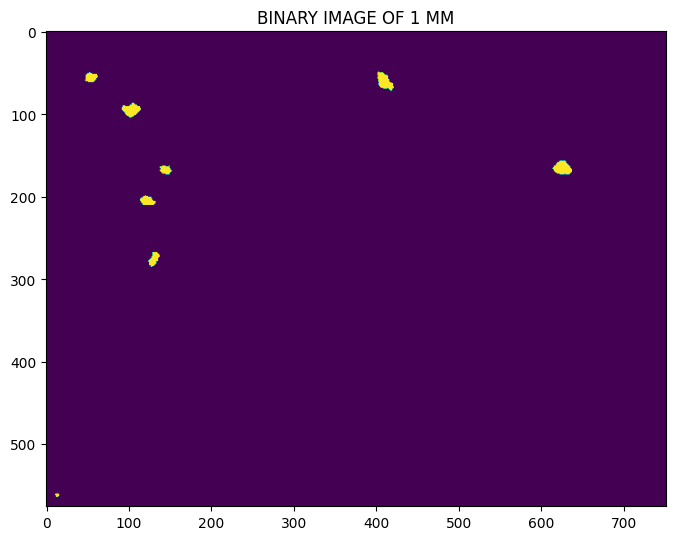

In [14]:
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.title("BINARY IMAGE OF 1 MM")

# Trovo il numero di quante di particelle ci sono in una imagine

In [10]:
contornos, herarquia= cv2.findContours(image_array, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
numero_tot_particles= len(contornos)
print("Il Numero di Particelle trovate e' di: ", len(contornos))

Il Numero di Particelle trovate e' di:  8


# Imagine px_b = di una imagine base;  px_z= di una imagine con zoom
# Charge-coupled device B-ZOOM

<img src="images_notebook/px_zoom_base.png" style="width: 250px;"/>

In [11]:
# distanza in mm di una imagine BASE
dist_one_px_b=0.075
area_px_b= dist_one_px_b*dist_one_px_b
print("Distanza in mm di uno PX di una imagine BASE:", dist_one_px_b, " e la sua AREA e' di: ", area_px_b)

# distanza in mm di una imagine ZOOM
dist_one_px_z=0.015
area_px_z= dist_one_px_z*dist_one_px_z
print("Distanza in mm di uno PX di una imagine ZOOM:", dist_one_px_z, "e la sua AREA e' di: ", area_px_z)

Distanza in mm di uno PX di una imagine BASE: 0.075  e la sua AREA e' di:  0.005625
Distanza in mm di uno PX di una imagine ZOOM: 0.015 e la sua AREA e' di:  0.000225


# Separo le particele ogni una in una single Image; qui utlilizo el metodo del la circunferenza X_area usata dal Camsizer

<img src="images_notebook/area_circulo.png" style="width: 450px;"/>

In [22]:
# creo una imagine vuota
blank_image= np.zeros((image_array.shape),np.uint8)
# creo una lista per salvare tutti i risutalti x_area
list_x_area=[]

print(color.BOLD+ "L'area e la sommatoria di ogni area pixel che apartiene alla particella","\n"+ color.END)

# Creo un ciclo per salvare ogni particella in una sigle imagine
for i,c in enumerate(contornos[::-1]):
    ## reseteo la imagine in ogni giro del ciclo
    blank_image*=0
    ## Riempisco ogni pixel di un contorno con 255 e lo grafico
    cv2.drawContours(blank_image,[c],0,(255), thickness=cv2.FILLED)
    ## Calcolo il numero totale di pixels che la particella
    number_of_white_pix= np.sum(blank_image==255)    
    area_of_particle_b= area_px_b*number_of_white_pix
    
    ##Diametro del cercio equivalente della particella
    x_area=  (math.sqrt((4*area_of_particle_b)/(math.pi)))
    
    ## Area della particella pi*radio**2
    area_circunference= (math.pi)*(x_area/2)**2
    
    ## Calcolo il volume
    vol_sphere= ((area_circunference**3)*math.pi)/6
    
    ## ripieno la lista con tutti i valori Diametro del cercio ecquivalente
    list_x_area.append([x_area])

    
    print("particella:",i,"ha un diametro =",color.RED + color.BOLD+" x_area di:",  format(x_area,".3f"),"mm" + color.END, "e un volume di: " ,color.RED + color.BOLD+ format((vol_sphere),".3f") + color.END,)

    #print("particella:",i,"ha", number_of_white_pix, "pixels",color.RED + color.BOLD+"un diametro = x_area di:",  format(x_area,".3f"),"mm" + color.END, "e un volume di: ", format((vol_sphere),".3f"))
    #print("la sommatoria delle area di ogni singolo px e': ", color.BOLD + format(area_of_particle_b,".3f"),"mm"+ color.END)
    # print(len(list_x_area))
#print(list_x_area)

L'area e la sommatoria di ogni area pixel che apartiene alla particella 

particella: 0 ha un diametro =  x_area di: 1.414 mm e un volume di:  2.024
particella: 1 ha un diametro =  x_area di: 0.987 mm e un volume di:  0.234
particella: 2 ha un diametro =  x_area di: 1.354 mm e un volume di:  1.563
particella: 3 ha un diametro =  x_area di: 1.434 mm e un volume di:  2.203
particella: 4 ha un diametro =  x_area di: 0.927 mm e un volume di:  0.161
particella: 5 ha un diametro =  x_area di: 1.067 mm e un volume di:  0.375
particella: 6 ha un diametro =  x_area di: 1.033 mm e un volume di:  0.308
particella: 7 ha un diametro =  x_area di: 0.359 mm e un volume di:  0.001


# Qui utilizo il metodo della Corda minima - xc_min (larghezza): si riferisce alla lunghezza minima della particella nella direzione di misura.

<img src="images_notebook/x_min-corda-minima.png" style="width: 800px;"/>

In [27]:
# creo una imagine vuota
blank_image_1= np.zeros((image_array.shape),np.uint8)
print(color.BOLD + "La corda Minima Xc_min e': " + color.END)
# Creo un ciclo per salvare ogni particella in una sigle imagine
for i,c in enumerate(contornos[::-1]):
    ## reseteo la imagine in ogni giro del ciclo
    blank_image_1*=0
    ## Riempisco ogni pixel di un contorno con 255 e lo grafico
    cv2.drawContours(blank_image_1,[c],0,(255), thickness=cv2.FILLED)
    ## Calcolo il numero totale di pixels che la particella
    number_of_white_pix= np.sum(blank_image==255)
    area_of_particle_b= area_px_b*number_of_white_pix
    #creo una copia di 1, che se somaranno al valore finale
    tupla_unos=(1,1)
    #calcolo le coordenate dei punti cardinali della particella
    x_min = tuple(c[c[:,:,0].argmin()][0])
    x_max = tuple(c[c[:,:,0].argmax()][0])
    y_min = tuple(c[c[:,:,1].argmin()][0])
    y_max = tuple(c[c[:,:,1].argmax()][0])
    ## resto i valori dei px per calcolare il numero di pixel verticali ed orizontali
    resta_x = tuple(map(operator.sub,x_max,x_min))
    resta_y= tuple(map(operator.sub, y_max,y_min))
    ##al risutato li sumo 1 per equilibrare il errore.
    max_px_tot_in_x= tuple(map(operator.add, resta_x,tupla_unos))
    max_px_tot_in_y= tuple(map(operator.add, resta_y,tupla_unos))
    ##separo le copie e creo un unico valore x e y
    px_tot_in_x= max_px_tot_in_x[0]
    px_tot_in_y=max_px_tot_in_y[1]
    
    xc_min=0
    xfe_max=0
    
    if px_tot_in_x <= px_tot_in_y:
        xc_min=px_tot_in_x*dist_one_px_b
    elif px_tot_in_x > px_tot_in_y:
        xc_min= px_tot_in_y*dist_one_px_b
        
    print("particella:",i,"ha un:",color.RED + color.BOLD+" xc_min =", format(xc_min,".3f")+ color.END,)

La corda Minima Xc_min e': 
particella: 0 ha un:  xc_min = 1.500
particella: 1 ha un:  xc_min = 0.900
particella: 2 ha un:  xc_min = 1.350
particella: 3 ha un:  xc_min = 1.275
particella: 4 ha un:  xc_min = 0.825
particella: 5 ha un:  xc_min = 0.900
particella: 6 ha un:  xc_min = 1.050
particella: 7 ha un:  xc_min = 0.375


# xFe – Diametro di Feret: Distanza tra due tangenti alla particella poste a 90°

<img src="images_notebook/xfe_max.png" style="width: 800px;"/>

In [28]:
# creo una imagine vuota
blank_image_3= np.zeros((image_array.shape),np.uint8)
print('\033[1m' + "Il Diametro di Feret Xfe_Max e': " + '\033[0m' ) 
# Creo un ciclo per salvare ogni particella in una sigle imagine
for i,c in enumerate(contornos[::-1]):
    ## reseteo la imagine in ogni giro del ciclo
    blank_image_1*=0
    ## Riempisco ogni pixel di un contorno con 255 e lo grafico
    cv2.drawContours(blank_image_3,[c],0,(255), thickness=cv2.FILLED)
    ## Calcolo il numero totale di pixels che la particella
    number_of_white_pix= np.sum(blank_image==255)
    area_of_particle_b= area_px_b*number_of_white_pix
    #creo una copia di 1, che se somaranno al valore finale
    tupla_unos=(1,1)
    #calcolo le coordenate dei punti cardinali della particella
    x_min = tuple(c[c[:,:,0].argmin()][0])
    x_max = tuple(c[c[:,:,0].argmax()][0])
    y_min = tuple(c[c[:,:,1].argmin()][0])
    y_max = tuple(c[c[:,:,1].argmax()][0])
    ## resto i valori dei px per calcolare il numero di pixel verticali ed orizontali
    resta_x = tuple(map(operator.sub,x_max,x_min))
    resta_y= tuple(map(operator.sub, y_max,y_min))
    ##al risutato li sumo 1 per equilibrare il errore.
    max_px_tot_in_x= tuple(map(operator.add, resta_x,tupla_unos))
    max_px_tot_in_y= tuple(map(operator.add, resta_y,tupla_unos))
    ##separo le copie e creo un unico valore x e y
    px_tot_in_x= max_px_tot_in_x[0]
    px_tot_in_y=max_px_tot_in_y[1]
    
    xc_min=0
    xfe_max=0
    
    if px_tot_in_x <= px_tot_in_y:
        xfe_max= px_tot_in_y*dist_one_px_b
    elif px_tot_in_x > px_tot_in_y:
        xfe_max=px_tot_in_x*dist_one_px_b
     
    print("particella:",i,"ha un:",color.RED + color.BOLD+"xfe_max", format(xfe_max,".3f"),color.END)

Il Diametro di Feret Xfe_Max e': 
particella: 0 ha un: xfe_max 1.800 
particella: 1 ha un: xfe_max 1.200 
particella: 2 ha un: xfe_max 1.725 
particella: 3 ha un: xfe_max 1.800 
particella: 4 ha un: xfe_max 1.125 
particella: 5 ha un: xfe_max 1.425 
particella: 6 ha un: xfe_max 1.350 
particella: 7 ha un: xfe_max 0.375 


# que faccio vedere tutti i 3 valori ottenuti dei 3 modeli

particella: 0 ha 279 pixels
x_area=  1.41
xc_min=  1.50
xfe_max =  1.80
 
Il volume ellipsoid e':  2.12
Il Volume sphere e':  2.02


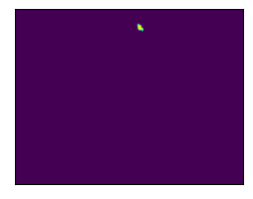

particella: 1 ha 136 pixels
x_area=  0.99
xc_min=  0.90
xfe_max =  1.20
 
Il volume ellipsoid e':  0.51
Il Volume sphere e':  0.23


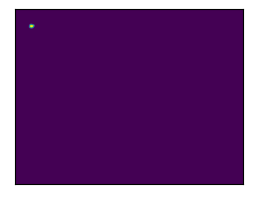

particella: 2 ha 256 pixels
x_area=  1.35
xc_min=  1.35
xfe_max =  1.72
 
Il volume ellipsoid e':  1.65
Il Volume sphere e':  1.56


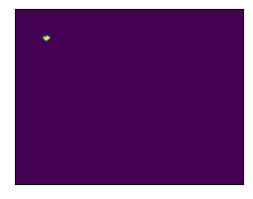

particella: 3 ha 287 pixels
x_area=  1.43
xc_min=  1.27
xfe_max =  1.80
 
Il volume ellipsoid e':  1.53
Il Volume sphere e':  2.20


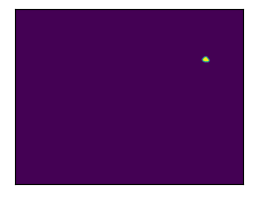

particella: 4 ha 120 pixels
x_area=  0.93
xc_min=  0.82
xfe_max =  1.12
 
Il volume ellipsoid e':  0.40
Il Volume sphere e':  0.16


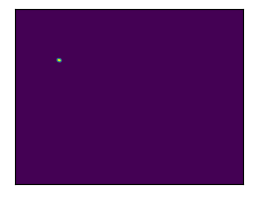

particella: 5 ha 159 pixels
x_area=  1.07
xc_min=  0.90
xfe_max =  1.43
 
Il volume ellipsoid e':  0.60
Il Volume sphere e':  0.37


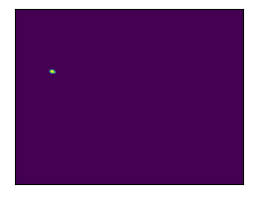

particella: 6 ha 149 pixels
x_area=  1.03
xc_min=  1.05
xfe_max =  1.35
 
Il volume ellipsoid e':  0.78
Il Volume sphere e':  0.31


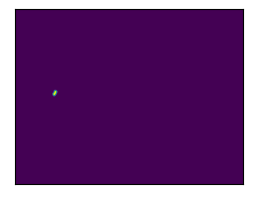

particella: 7 ha 18 pixels
x_area=  0.36
xc_min=  0.38
xfe_max =  0.38
 
Il volume ellipsoid e':  0.03
Il Volume sphere e':  0.00


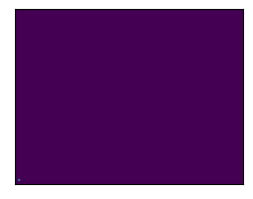

In [29]:
for i,c in enumerate(contornos[::-1]):
    ## reseteo la imagine in ogni giro del ciclo
    blank_image*=0
    ## Riempisco ogni pixel di un contorno con 255 e lo grafico
    cv2.drawContours(blank_image,[c],0,(255), thickness=cv2.FILLED)
    ## Calcolo il numero totale di pixels che la particella
    number_of_white_pix= np.sum(blank_image==255)
    area_of_particle_b= area_px_b*number_of_white_pix
    x_area=  (math.sqrt(4*area_of_particle_b/(math.pi)))
    area_circunference= (math.pi)*(x_area/2)**2
    vol_sphere= ((area_circunference**3)*math.pi)/6
    
    #creo una copia di 1, che se somaranno al valore finale
    tupla_unos=(1,1)
    #calcolo le coordenate dei punti cardinali della particella
    x_min = tuple(c[c[:,:,0].argmin()][0])
    x_max = tuple(c[c[:,:,0].argmax()][0])
    y_min = tuple(c[c[:,:,1].argmin()][0])
    y_max = tuple(c[c[:,:,1].argmax()][0])
    ## resto i valori dei px per calcolare il numero di pixel verticali ed orizontali
    resta_x = tuple(map(operator.sub,x_max,x_min))
    resta_y= tuple(map(operator.sub, y_max,y_min))
    ##al risutato li sumo 1 per equilibrare il errore.
    max_px_tot_in_x= tuple(map(operator.add, resta_x,tupla_unos))
    max_px_tot_in_y= tuple(map(operator.add, resta_y,tupla_unos))
    ##separo le copie e creo un unico valore x e y
    px_tot_in_x= max_px_tot_in_x[0]
    px_tot_in_y=max_px_tot_in_y[1]
    
    xc_min=0
    xfe_max=0
    
    if px_tot_in_x <= px_tot_in_y:
        xc_min=px_tot_in_x*dist_one_px_b
        xfe_max= px_tot_in_y*dist_one_px_b
    elif px_tot_in_x >= px_tot_in_y:
        xc_min= px_tot_in_y*dist_one_px_b
        xfe_max=px_tot_in_x*dist_one_px_b
        
    vol_ellipsoid= (xfe_max*(xc_min**2)*math.pi)/6
        
    print(color.BOLD+ "particella:",i ,"ha", number_of_white_pix, "pixels"+color.END)
    print("x_area= ", format(x_area,".2f"))
    print("xc_min= ",format(xc_min,".2f"))
    print("xfe_max = ",format (xfe_max,".2f"))
    
    print(" ")
    print("Il volume ellipsoid e': ", format(vol_ellipsoid,".2f"))
    print("Il Volume sphere e': ", format(vol_sphere,".2f"))

    plt.figure(figsize=(5,5))
    plt.subplot(211)
    plt.imshow(blank_image, interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
    

<img src="images_notebook/5mm.png" style="width: 1000px;"/>

<img src="images_notebook/07-2.png" style="width: 1000px;"/>

<img src="images_notebook/0-2punto8.png" style="width: 1000px;"/>

In [33]:
# creo una imagine vuota
blank_image= np.zeros((image_array.shape),np.uint8)
blank_image_a = np.zeros((image_array.shape),np.uint8)
# creo una lista per salvare tutti i risutalti x_area
count=0

list_x_area=[]
list_obj=[]

print(color.BOLD+ "L'area e la sommatoria di ogni area pixel che apartiene alla particella","\n"+ color.END)

# Creo un ciclo per salvare ogni particella in una sigle imagine
for i,c in enumerate(contornos[::-1]):
    ## reseteo la imagine in ogni giro del ciclo
    blank_image*=0
    ## Riempisco ogni pixel di un contorno con 255 e lo grafico
    cv2.drawContours(blank_image,[c],0,(255), thickness=cv2.FILLED)
    ## Calcolo il numero totale di pixels che la particella
    number_of_white_pix= np.sum(blank_image==255)    
    area_of_particle_b= area_px_b*number_of_white_pix
    
    ##Diametro del cercio equivalente della particella
    x_area=  (math.sqrt((4*area_of_particle_b)/(math.pi)))
    
    ## Area della particella pi*radio**2
    area_circunference= (math.pi)*(x_area/2)**2
    
    ## Calcolo il volume
    vol_sphere= ((area_circunference**3)*math.pi)/6
    
    ## ripieno la lista con tutti i valori Diametro del cercio ecquivalente
    list_x_area.append([x_area])
    list_obj.append([number_of_white_pix])
    
    
  
    print("particella:",i,"ha", number_of_white_pix, "pixels",color.RED + color.BOLD+"un diametro = x_area di:",  format(x_area,".3f"),"mm" + color.END, "e un volume di: ", format((vol_sphere),".3f"))
#     print("la sommatoria delle area di ogni singolo px e': ", color.BOLD + format(area_of_particle_b,".3f"),"mm"+ color.END)
    
    class size:
        clase_0003= x_area<0.003
        clase_0003_0014= x_area>=0.003 and x_area <= 0.014
        clase_0014_0032= x_area>0.014 and x_area <= 0.032
        clase_0032_0045= x_area>0.032 and x_area <=0.045
        clase_0045_0063= x_area>0.045 and x_area <=0.063
        clase_0063_0090= x_area>0.063 and x_area <=0.090
        clase_0090_0125= x_area>0.090 and x_area <=0.125
        clase_0125_0180= x_area>0.125 and x_area <=0.180
        clase_0180_0250= x_area>0.180 and x_area <=0.250
        clase_0250_0350= x_area>0.250 and x_area <=0.350
        clase_0350_0500= x_area>0.350 and x_area <=0.500
        clase_0500_0710= x_area>0.500 and x_area <=0.710
        clase_0710_1000= x_area>0.710 and x_area <=1.000
        clase_1000_1400= x_area>1.000 and x_area <=1.400
        clase_1400_2000= x_area>1.400 and x_area <=2.000
        clase_2000_2800= x_area>2.000 and x_area <=2.800
        clase_2800_4000= x_area>2.800 and x_area <=4.000
        clase_4000_5600= x_area>4.000 and x_area <=5.600
        clase_5600_8000= x_area>5.600 and x_area <=8.000
        clase_8000_11200= x_area>8.000 and x_area <=11.200
        clase_11200_16000= x_area>11.200 and x_area <=16.000
        clase_16000_22400= x_area>16.000 and x_area <=22.400
        clase_22400_32000= x_area>22.400 and x_area <=32.000
    
    if size.clase_0003 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(14), thickness=cv2.FILLED)
    elif size.clase_0003_0014 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(15), thickness=cv2.FILLED)
    elif size.clase_0014_0032 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(16), thickness=cv2.FILLED)
    elif size.clase_0032_0045 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(17), thickness=cv2.FILLED)
    elif size.clase_0045_0063 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(18), thickness=cv2.FILLED)
    elif size.clase_0063_0090 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(19), thickness=cv2.FILLED)
    elif size.clase_0090_0125 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(20), thickness=cv2.FILLED)
    elif size.clase_0125_0180 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(21), thickness=cv2.FILLED)
    elif size.clase_0180_0250 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(22), thickness=cv2.FILLED)
    elif size.clase_0250_0350 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(23), thickness=cv2.FILLED)
    elif size.clase_0350_0500 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(24), thickness=cv2.FILLED)
    elif size.clase_0500_0710 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(25), thickness=cv2.FILLED)
    elif size.clase_0710_1000 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(26), thickness=cv2.FILLED)
    elif size.clase_1000_1400 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(27), thickness=cv2.FILLED)
    elif size.clase_1400_2000 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(28), thickness=cv2.FILLED)
    elif size.clase_2000_2800 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(29), thickness=cv2.FILLED)
    elif size.clase_2800_4000 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(30), thickness=cv2.FILLED)
    elif size.clase_4000_5600 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(31), thickness=cv2.FILLED)
    elif size.clase_5600_8000 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(32), thickness=cv2.FILLED)
    elif size.clase_8000_11200 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(33), thickness=cv2.FILLED)
    elif size.clase_11200_16000 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(34), thickness=cv2.FILLED)
    elif size.clase_16000_22400 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(35), thickness=cv2.FILLED)
    elif size.clase_22400_32000 == True:
        clases=cv2.drawContours(blank_image_a,[c],0,(36), thickness=cv2.FILLED)
    else:
         clases=cv2.drawContours(blank_image_a,[c],0,(255), thickness=cv2.FILLED)      
#         img_merge= cv2.add(clases[:],clases[:])

# cv2.imwrite("C:/Users/jfran/OneDrive/Escritorio/aaaauno.png",img_merge)
cv2.imwrite(ruta_resultados+'/clase2_test__'+str(count)+".png", clases)
   
# print(list_obj)
# print(list_x_area)



L'area e la sommatoria di ogni area pixel che apartiene alla particella 

particella: 0 ha 279 pixels un diametro = x_area di: 1.414 mm e un volume di:  2.024
particella: 1 ha 136 pixels un diametro = x_area di: 0.987 mm e un volume di:  0.234
particella: 2 ha 256 pixels un diametro = x_area di: 1.354 mm e un volume di:  1.563
particella: 3 ha 287 pixels un diametro = x_area di: 1.434 mm e un volume di:  2.203
particella: 4 ha 120 pixels un diametro = x_area di: 0.927 mm e un volume di:  0.161
particella: 5 ha 159 pixels un diametro = x_area di: 1.067 mm e un volume di:  0.375
particella: 6 ha 149 pixels un diametro = x_area di: 1.033 mm e un volume di:  0.308
particella: 7 ha 18 pixels un diametro = x_area di: 0.359 mm e un volume di:  0.001


True

In [30]:
size=[0.003,0.014,0.032,0.045,0.063,0.090,0.125,0.180,0.250,0.350,0.500,0.710,1.000,1.400,2.000,2.800,4.000,5.600,8.000,11.200,16.000,22.400]



In [31]:
px_totales= (((1.2437789380968076)*3.14)**0.5/(4*area_px_b))
print(px_totales)

87.83222913775228


# calculo Area di una particella accordo ai numeri di pixels

In [32]:
for p in range(1500):
    x_area_t=  (math.sqrt((4*0.005625*p)/(math.pi)))
    print(p, x_area_t)

0 0.0
1 0.08462843753216344
2 0.1196826841204298
3 0.146580753570876
4 0.16925687506432688
5 0.189234939151512
6 0.2072964896828013
7 0.22390579955406922
8 0.2393653682408596
9 0.25388531259649033
10 0.26761861742291565
11 0.2806807738882166
12 0.293161507141752
13 0.3051321708846164
14 0.3166506184233564
15 0.3277645291776237
16 0.33851375012865376
17 0.3489319868760959
18 0.3590480523612894
19 0.36888680695244513
20 0.378469878303024
21 0.38781622093698076
22 0.396942557130092
23 0.4058637284854507
24 0.4145929793656026
25 0.42314218766081724
26 0.43152205438136937
27 0.4397422607126279
28 0.44781159910813845
29 0.4557380834809874
30 0.4635290424278275
31 0.4711911985735663
32 0.4787307364817192
33 0.4861533610821431
34 0.4934643481859656
35 0.5006685883593409
36 0.5077706251929807
37 0.5147746888183273
38 0.5216847253726536
39 0.5285044229959446
40 0.5352372348458313
41 0.5418863995382676
42 0.5484549593573589
43 0.5549457765248939
44 0.5613615477764332
45 0.567704817454536
46 0.573